# Week 10-1 VADER와 로지스틱 회귀분석을 이용한 감성 분석

In [1]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
review_df=pd.read_csv("thinq_e_review_result.csv")

review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  
0      ['app', 'longer', 'work', 'updated', 'tell', '...  
1      ['everything', 'worked', 'fine', 'week', 'ago'...  
2      ['app', 'work', 'wired', 'tv', 'connection', '...  
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...  
4      ['embarrassing', 'absolutely', 'connect', 'goo...  
...                                                  ...  
11275                   ['good', 'app', 'useful', 'far']  
11276                 ['helpful', 'hope', 'stay', 'way']  
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']  
11278                      ['error', 'routed', 'device']  
11279                ['connected', 'washing', 'machine']  

[11280 rows x 5 columns]

In [2]:
del_index=review_df[review_df['star']==3].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(10153, 5)

In [3]:
review_df['sentiment']=review_df['star'].apply(lambda x: 1 if x>=4 else 0)
review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  sentiment  
0      ['app', 'longer', 'work', 'updated', 'tell', '...          0  
1      ['everything', 'worked', 'fine', 'week', 'ago'...          0  
2      ['app', 'work', 'wired', 'tv', 'connection', '...          0  
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...          0  
4      ['embarrassing', 'absolutely', 'connect', 'goo...          0  
...                                                  ...        ...  
11275                   ['good', 'app', 'useful', 'far']          1  
11276                 ['helpful', 'hope', 'stay', 'way']          1  
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']          1  
11278                      ['error', 'routed', 'device']          0  
11279                ['connected', 'washing', 'machine']          0  

[10153 rows x 6 columns]

<AxesSubplot:>

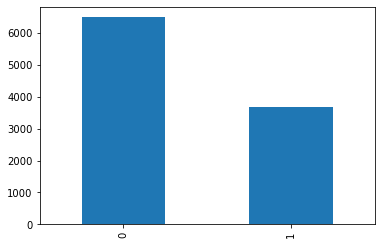

In [4]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [6]:
#import nltk
#nltk.download('all')
#nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['comment'][0])
print(senti_scores)

{'neg': 0.037, 'neu': 0.933, 'pos': 0.03, 'compound': -0.1027}


In [7]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

In [8]:
review_df['vader_preds'] = review_df['comment'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print('#### VADER 예측 성능 평가 ####')
get_clf_eval(y_target, vader_preds)

#### VADER 예측 성능 평가 ####
오차 행렬
[[4613 1869]
 [ 653 3018]]
정확도: 0.7516, 정밀도: 0.6176, 재현율: 0.8221,    F1: 0.7053, AUC:0.7669


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(review_df['comment'], review_df['sentiment'], test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((7107,), (3046,))

In [10]:
# 로지스틱 회귀분석

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10,max_iter=1000))])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

print('#### 로지스틱 회귀 감성 분류 예측 성능 평가 ####')
get_clf_eval(y_test, pred)


#### 로지스틱 회귀 감성 분류 예측 성능 평가 ####
오차 행렬
[[1816  145]
 [ 210  875]]
정확도: 0.8835, 정밀도: 0.8578, 재현율: 0.8065,    F1: 0.8314, AUC:0.8663


In [12]:
# 전처리 후 로지스틱 회귀분석 수행하기

In [11]:
review_df['comment_n_str']=review_df['comment_n'].apply(lambda x: " ".join(eval(x)))
review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  sentiment  \
0      ['app', 'longer', 'work', 'updated', 'tell', '...          0   
1      ['everything', 'worked', 'fine', 'week', 'ago'...          0   
2      ['app', 'work', 'wired', 'tv', 'connection', '...          0   
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...          0   
4      ['embarrassing', 'absolutely', 'connect', 'goo...          0   
...                                                  ...        ...   
11275                   ['good', 'app', 'useful', 'far']          1   
11276                 ['helpful', 'hope', 'stay', 'way']          1   
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']          1   
11278                      ['error', 'routed', 'device']          0   
11279                ['connected', 'washing', 'machine']          0   

       vader_preds                                      comment_n_str  
0                0  app longer work updated tell login incorrect t...  
1                1  everything worked fine week ago connect oven a...  
2                1  app work wired tv connection edit tried app tv...  
3                1  trying alexa connection turn lg tv webos tv lg...  
4                0  embarrassing absolutely connect google home de...  
...            ...                                                ...  
11275            1                                good app useful far  
11276            1                              helpful hope stay way  
11277            1                  worked like gave feedback wanting  
11278            0                                error routed device  
11279            0                          connected washing machine  

[10153 rows x 8 columns]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(review_df['comment_n_str'], review_df['sentiment'], test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((7107,), (3046,))

In [13]:
# 로지스틱 회귀분석

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10, max_iter=1000))])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

print('#### 로지스틱 회귀 감성 분류 예측 성능 평가 ####')
get_clf_eval(y_test, pred)


#### 로지스틱 회귀 감성 분류 예측 성능 평가 ####
오차 행렬
[[1809  152]
 [ 227  858]]
정확도: 0.8756, 정밀도: 0.8495, 재현율: 0.7908,    F1: 0.8191, AUC:0.8566
